# Exploratory Data Analysis (EDA)

## Credit Risk Alternative Data - Xente Challenge Dataset

This notebook contains exploratory data analysis to understand the dataset structure, identify patterns, data quality issues, and form hypotheses for feature engineering.


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Suppress warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)


## 1. Data Loading


In [4]:
# Load the dataset
# Update the path to your data file
data_path = Path('../data/raw/data.csv')  # Adjust filename as needed

# Try loading the data
try:
    df = pd.read_csv(data_path)
    print(f"Data loaded successfully from {data_path}")
except FileNotFoundError:
    print(f"Data file not found at {data_path}")
    print("Please download the Xente Challenge dataset from:")
    print("https://www.kaggle.com/datasets/xente-challenge/xente-challenge")
    print("and place it in the data/raw/ directory")
    # Create a sample dataframe structure for demonstration
    df = pd.DataFrame()


Data loaded successfully from ../data/raw/data.csv


## 2. Overview of the Data


In [5]:
# Basic information about the dataset
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\nNumber of rows: {len(df):,}")
print(f"Number of columns: {len(df.columns)}")
print(f"\nDataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


DATASET OVERVIEW

Number of rows: 95,662
Number of columns: 16

Dataset shape: (95662, 16)
Memory usage: 66.48 MB


In [6]:
# Display column names and data types
print("\n" + "=" * 80)
print("COLUMN INFORMATION")
print("=" * 80)
print("\nColumn Names and Data Types:")
print(df.dtypes)



COLUMN INFORMATION

Column Names and Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [7]:
# Display first few rows
print("\n" + "=" * 80)
print("FIRST 5 ROWS")
print("=" * 80)
df.head()



FIRST 5 ROWS


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.00,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.00,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.00,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.00,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.00,644,2018-11-15T03:34:21Z,2,0


In [8]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Handle datetime columns
datetime_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            pd.to_datetime(df[col].iloc[0])
            datetime_cols.append(col)
        except:
            pass

print("\n" + "=" * 80)
print("COLUMN CATEGORIZATION")
print("=" * 80)
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
if datetime_cols:
    print(f"\nDatetime columns ({len(datetime_cols)}): {datetime_cols}")



COLUMN CATEGORIZATION

Numerical columns (5): ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']

Categorical columns (11): ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']

Datetime columns (1): ['TransactionStartTime']


## 3. Summary Statistics


In [9]:
# Summary statistics for numerical features
print("=" * 80)
print("SUMMARY STATISTICS - NUMERICAL FEATURES")
print("=" * 80)
df[numerical_cols].describe()


SUMMARY STATISTICS - NUMERICAL FEATURES


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.00,95662.00,95662.00,95662.00,95662.00
mean,256.00,6717.85,9900.58,2.26,0.00
std,0.00,123306.80,123122.09,0.73,0.04
min,256.00,-1000000.00,2.00,0.00,0.00
25%,256.00,-50.00,275.00,2.00,0.00
50%,256.00,1000.00,1000.00,2.00,0.00
75%,256.00,2800.00,5000.00,2.00,0.00
max,256.00,9880000.00,9880000.00,4.00,1.00


In [10]:
# Additional statistics: skewness and kurtosis
print("\n" + "=" * 80)
print("SKEWNESS AND KURTOSIS")
print("=" * 80)
stats_df = pd.DataFrame({
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis()
})
stats_df = stats_df.sort_values('Skewness', key=abs, ascending=False)
print(stats_df)



SKEWNESS AND KURTOSIS
                 Skewness  Kurtosis
Value               51.29   3378.07
Amount              51.10   3363.13
FraudResult         22.20    490.69
PricingStrategy      1.66      2.09
CountryCode          0.00      0.00


## 4. Distribution of Numerical Features


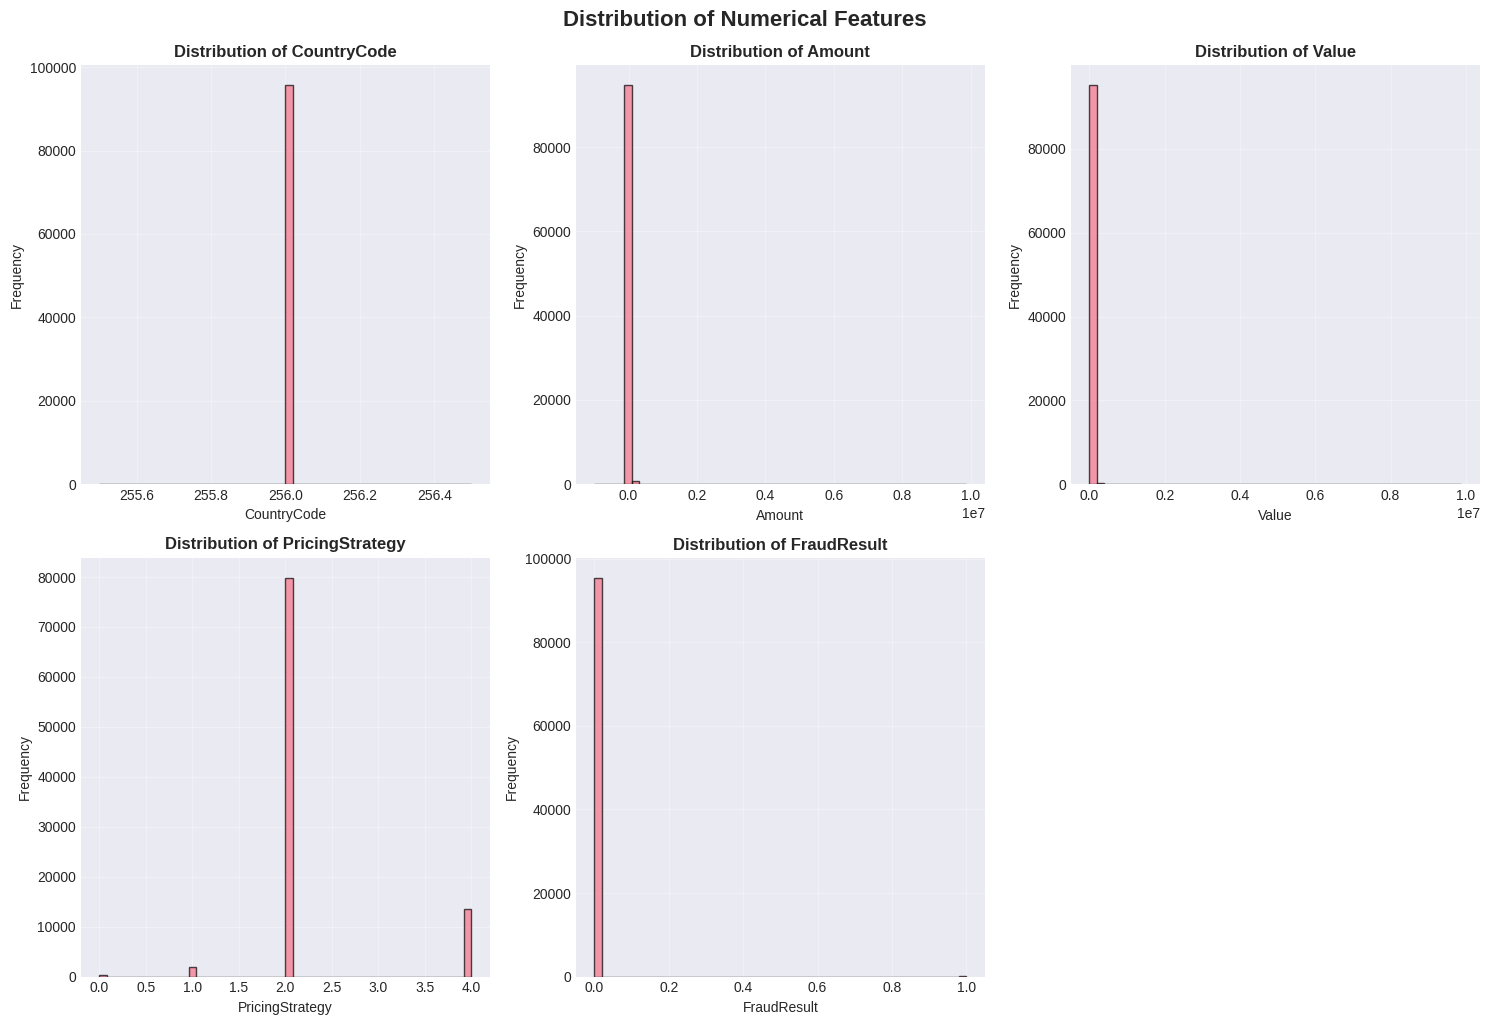

In [11]:
# Plot distributions for numerical features
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()


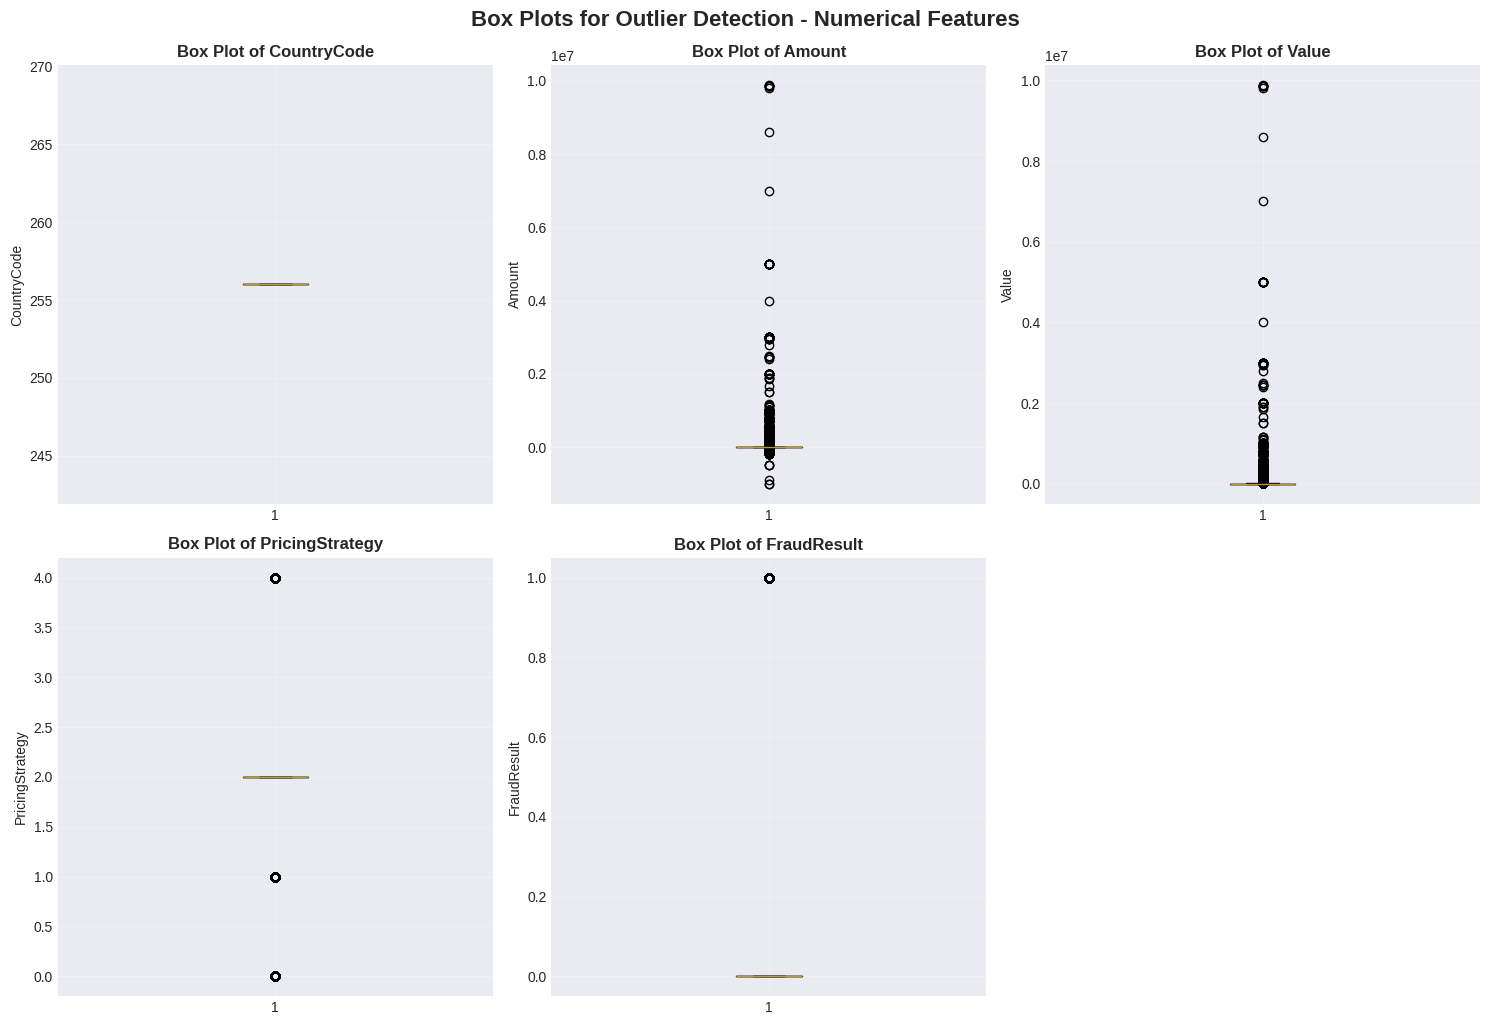

In [12]:
# Box plots for numerical features to identify outliers
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].boxplot(df[col].dropna(), vert=True)
        axes[idx].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)

# Hide empty subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Box Plots for Outlier Detection - Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.show()


## 5. Distribution of Categorical Features


In [13]:
# Analyze categorical features
print("=" * 80)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 80)

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most frequent values:")
    print(df[col].value_counts().head(10))
    print(f"  Value counts percentage:")
    print((df[col].value_counts(normalize=True) * 100).head(10).round(2))


CATEGORICAL FEATURES ANALYSIS

TransactionId:
  Unique values: 95662
  Most frequent values:
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64
  Value counts percentage:
TransactionId
TransactionId_76871    0.00
TransactionId_73770    0.00
TransactionId_26203    0.00
TransactionId_380      0.00
TransactionId_28195    0.00
TransactionId_23223    0.00
TransactionId_118063   0.00
TransactionId_100640   0.00
TransactionId_51905    0.00
TransactionId_130161   0.00
Name: proportion, dtype: float64

BatchId:
  Unique values: 94809
  Most frequent values:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_110084     7
BatchId_49408      7
BatchId_4233       6

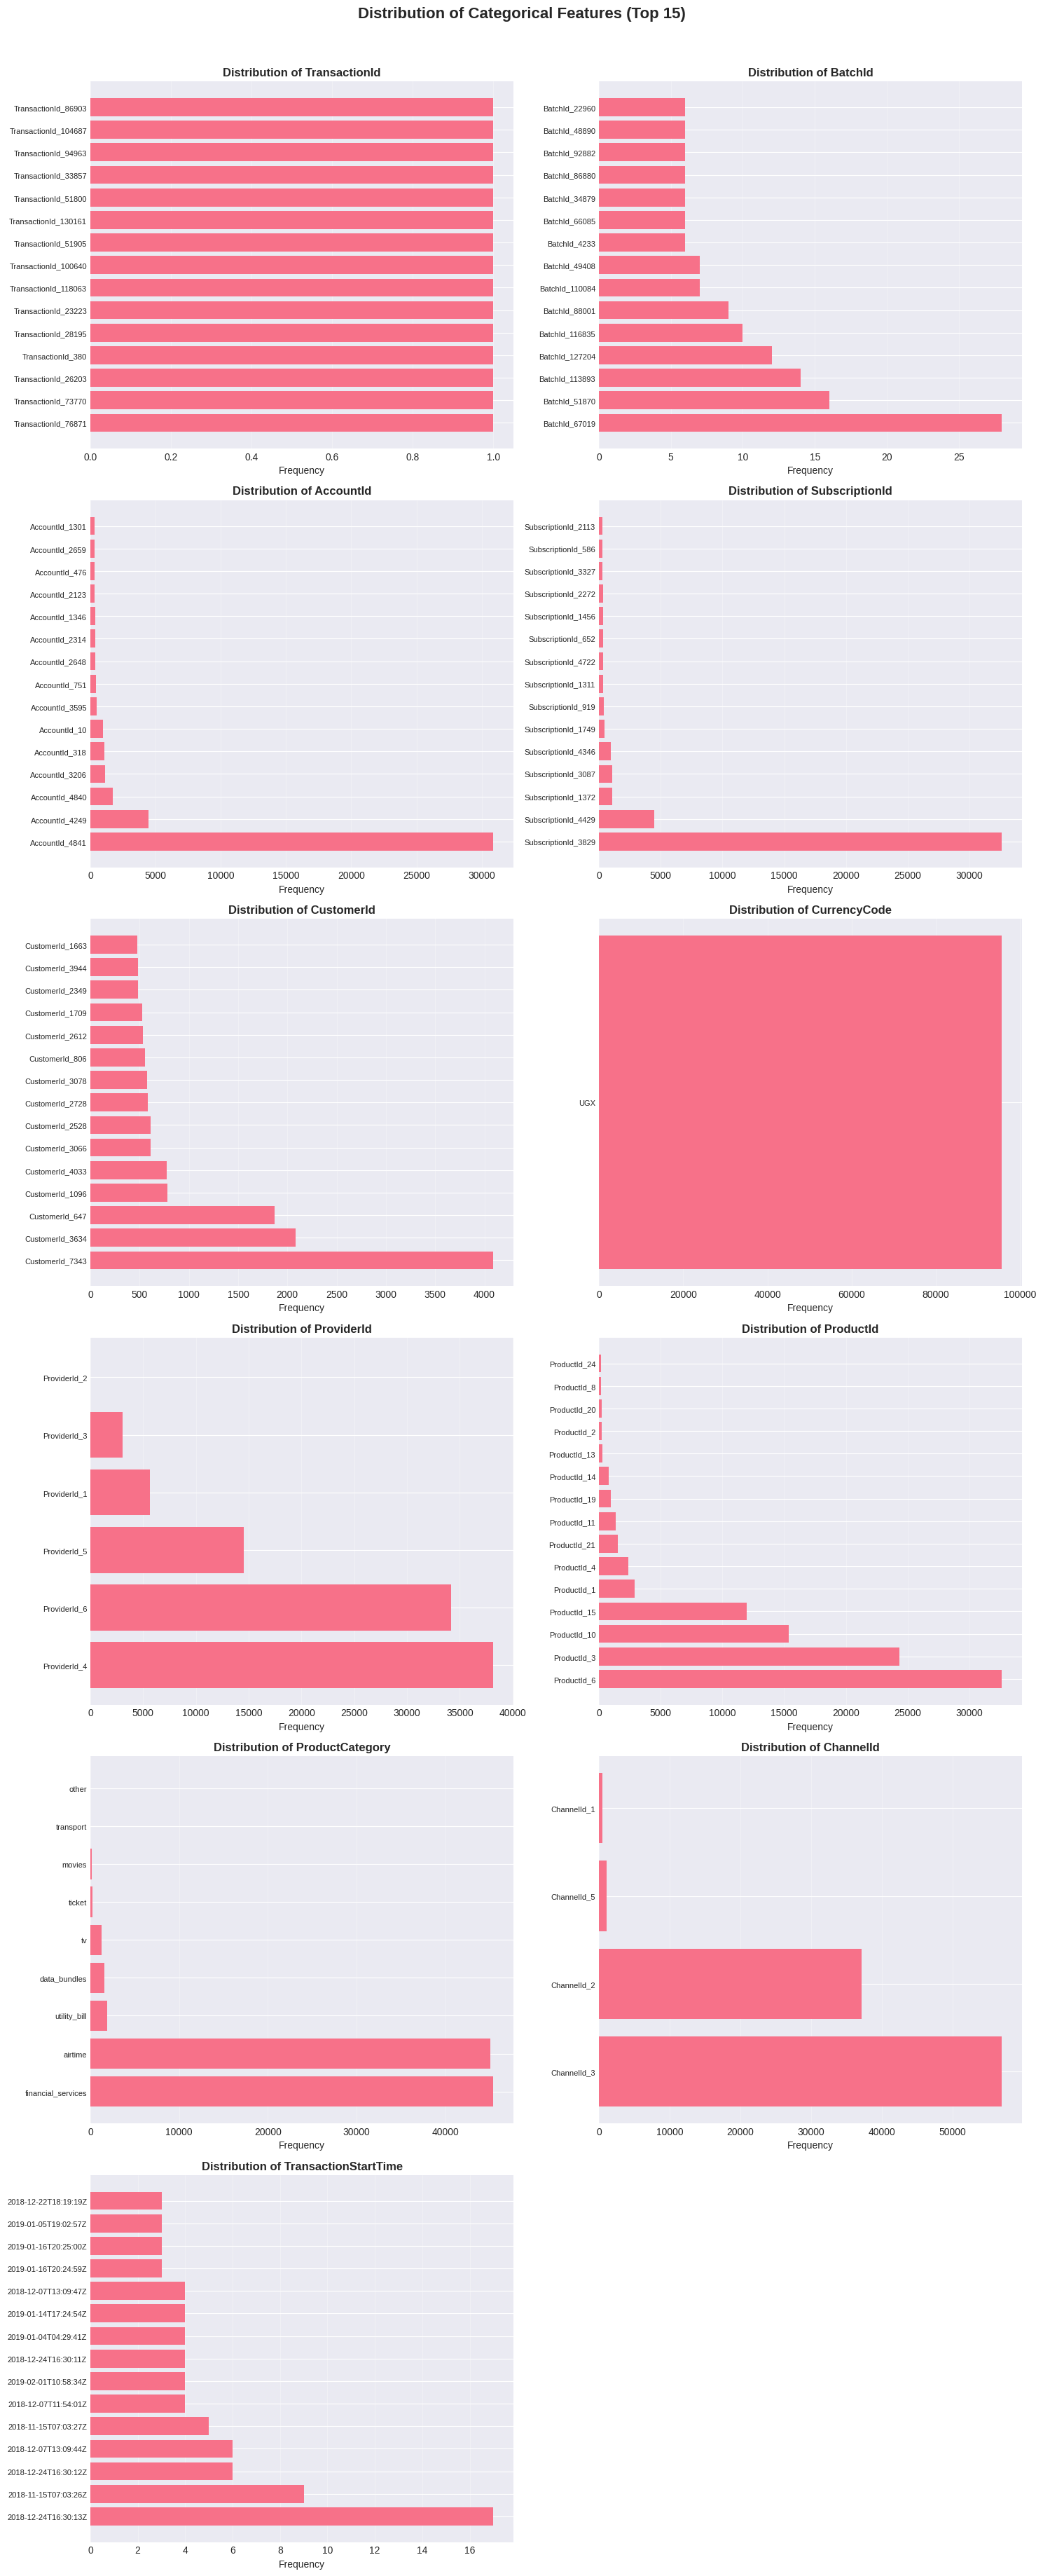

In [14]:
# Visualize categorical feature distributions
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        value_counts = df[col].value_counts().head(15)  # Top 15 categories
        axes[idx].barh(range(len(value_counts)), value_counts.values)
        axes[idx].set_yticks(range(len(value_counts)))
        axes[idx].set_yticklabels(value_counts.index, fontsize=8)
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Frequency')
        axes[idx].grid(True, alpha=0.3, axis='x')

# Hide empty subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribution of Categorical Features (Top 15)', fontsize=16, fontweight='bold', y=1.02)
plt.show()


## 6. Correlation Analysis


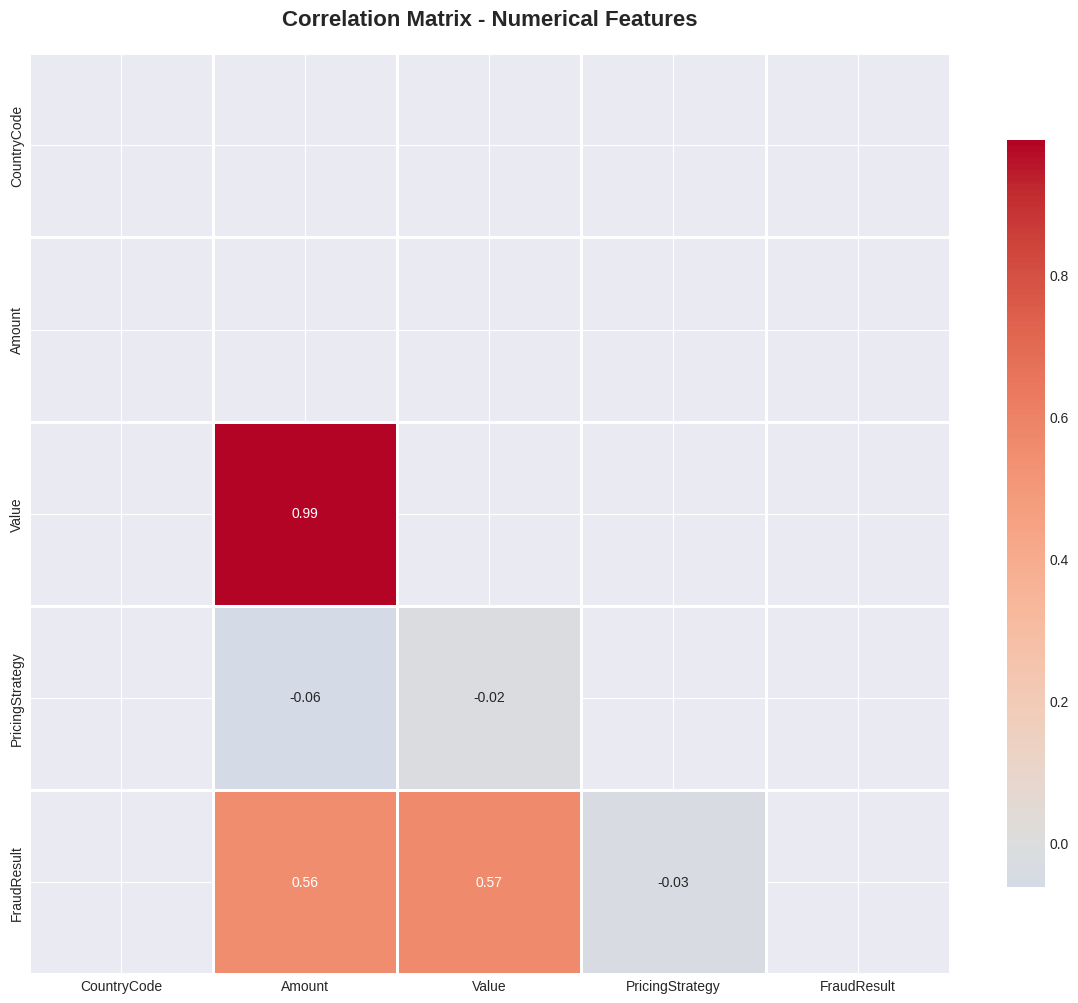

In [15]:
# Calculate correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [16]:
# Find highly correlated features (absolute correlation > 0.7)
print("=" * 80)
print("HIGHLY CORRELATED FEATURES (|correlation| > 0.7)")
print("=" * 80)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_val
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(high_corr_df.to_string(index=False))
else:
    print("No highly correlated pairs found (threshold: 0.7)")


HIGHLY CORRELATED FEATURES (|correlation| > 0.7)
Feature 1 Feature 2  Correlation
   Amount     Value         0.99


## 7. Identifying Missing Values


In [17]:
# Check for missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)
if len(missing_data) > 0:
    print("\nColumns with missing values:")
    print(missing_data.to_string(index=False))
else:
    print("\nNo missing values found in the dataset!")


MISSING VALUES ANALYSIS

No missing values found in the dataset!


In [22]:
# Visualize missing values
if len(missing_data) > 0:
    plt.figure(figsize=(12, 6))
    bars = plt.barh(missing_data['Column'], missing_data['Missing Percentage'])
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Columns', fontsize=12)
    plt.title('Missing Values by Column', fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='x')
    
    # Add value labels on bars
    for i, (idx, row) in enumerate(missing_data.iterrows()):
        plt.text(row['Missing Percentage'] + 0.5, i, 
                f"{row['Missing Percentage']:.2f}%", 
                va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()


## 8. Outlier Detection


In [21]:
# Detect outliers using IQR method
print("=" * 80)
print("OUTLIER DETECTION (IQR Method)")
print("=" * 80)

outlier_summary = []

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Column': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': outlier_count,
        'Outlier Percentage': outlier_percentage
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Outlier Percentage', ascending=False)
print(outlier_df.to_string(index=False))


OUTLIER DETECTION (IQR Method)
         Column  Lower Bound  Upper Bound  Outlier Count  Outlier Percentage
         Amount     -4325.00      7075.00          24441               25.55
PricingStrategy         2.00         2.00          15814               16.53
          Value     -6812.50     12087.50           9021                9.43
    FraudResult         0.00         0.00            193                0.20
    CountryCode       256.00       256.00              0                0.00


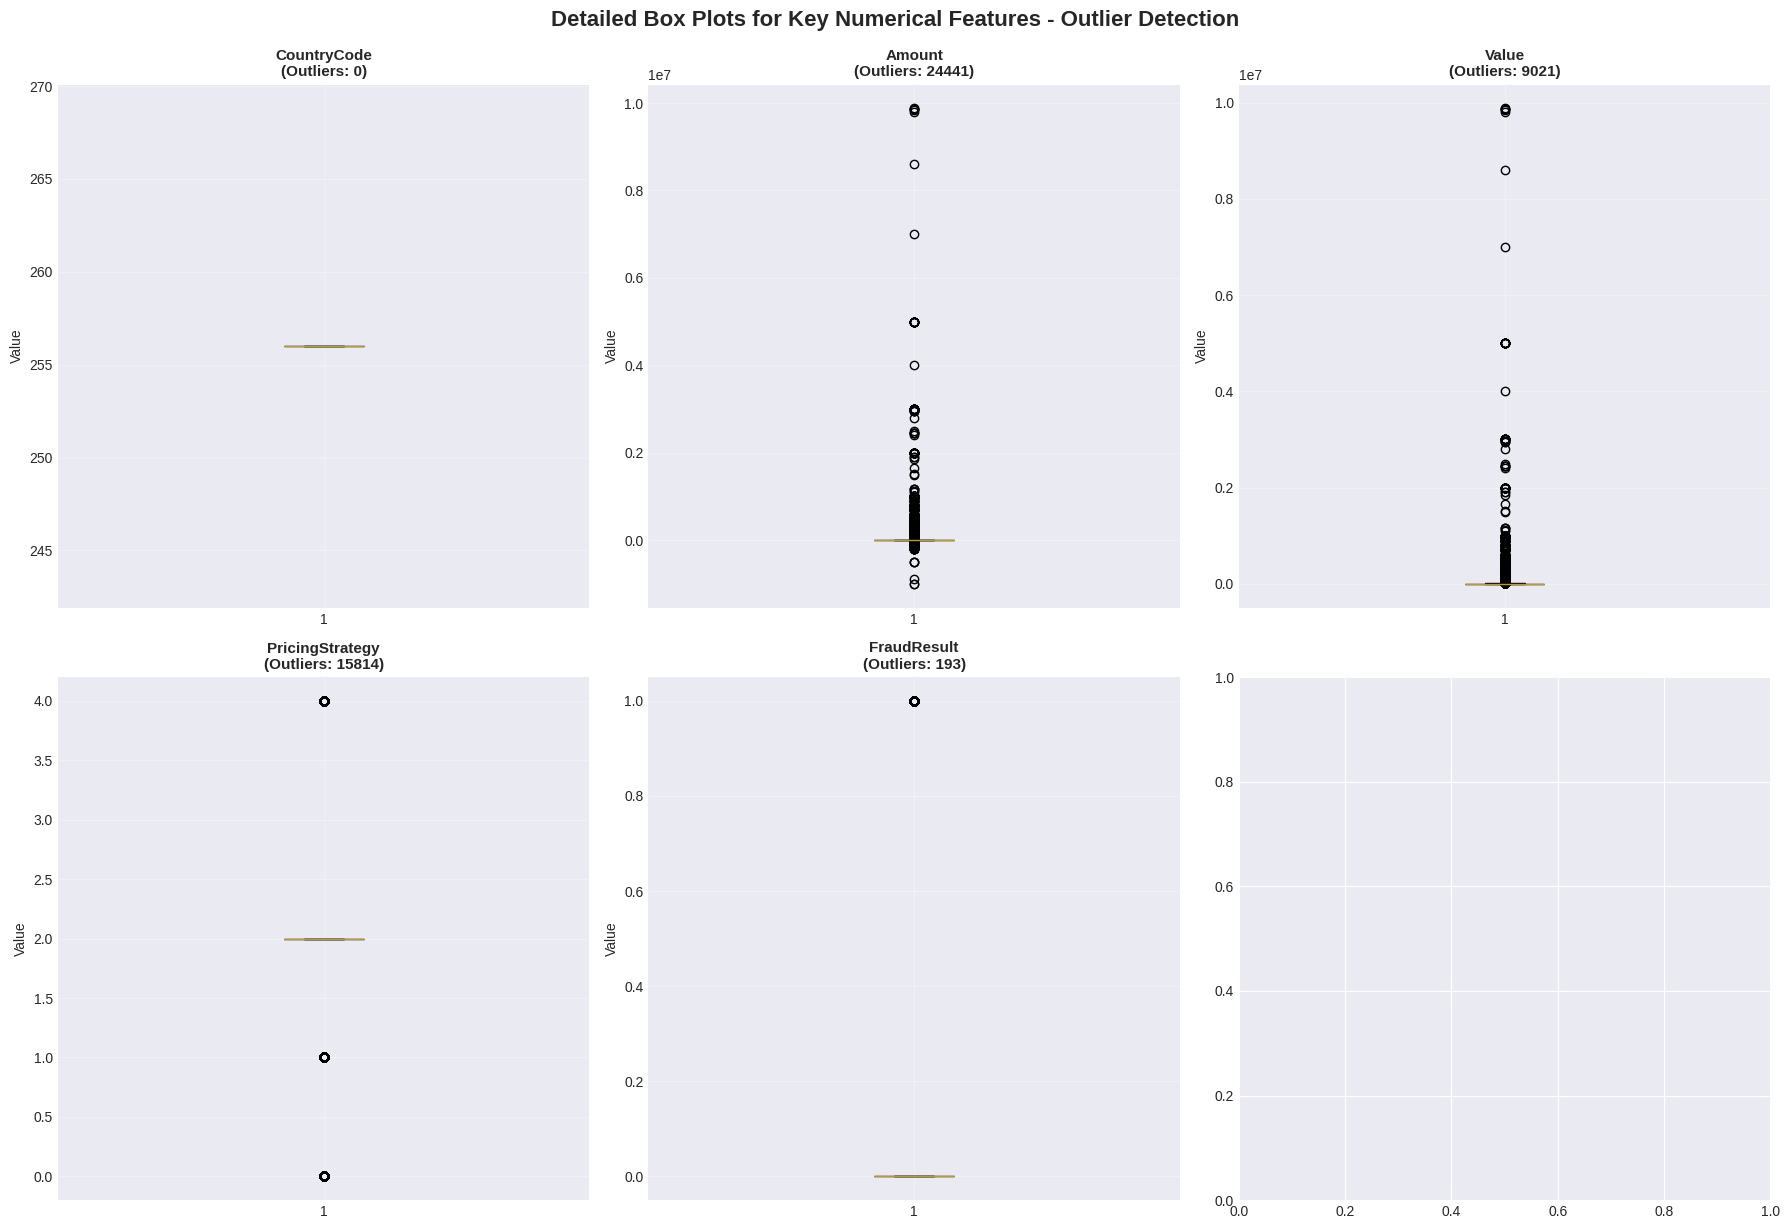

In [23]:
# Detailed box plots for key numerical features with outlier annotation
key_features = numerical_cols[:6]  # Analyze top 6 numerical features

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    bp = axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True)
    axes[idx].set_title(f'{col}\n(Outliers: {outlier_df[outlier_df["Column"]==col]["Outlier Count"].values[0] if col in outlier_df["Column"].values else 0})', 
                        fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)
    
    # Color the boxes
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')

plt.tight_layout()
plt.suptitle('Detailed Box Plots for Key Numerical Features - Outlier Detection', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()


## 9. Temporal Analysis (if TransactionStartTime exists)


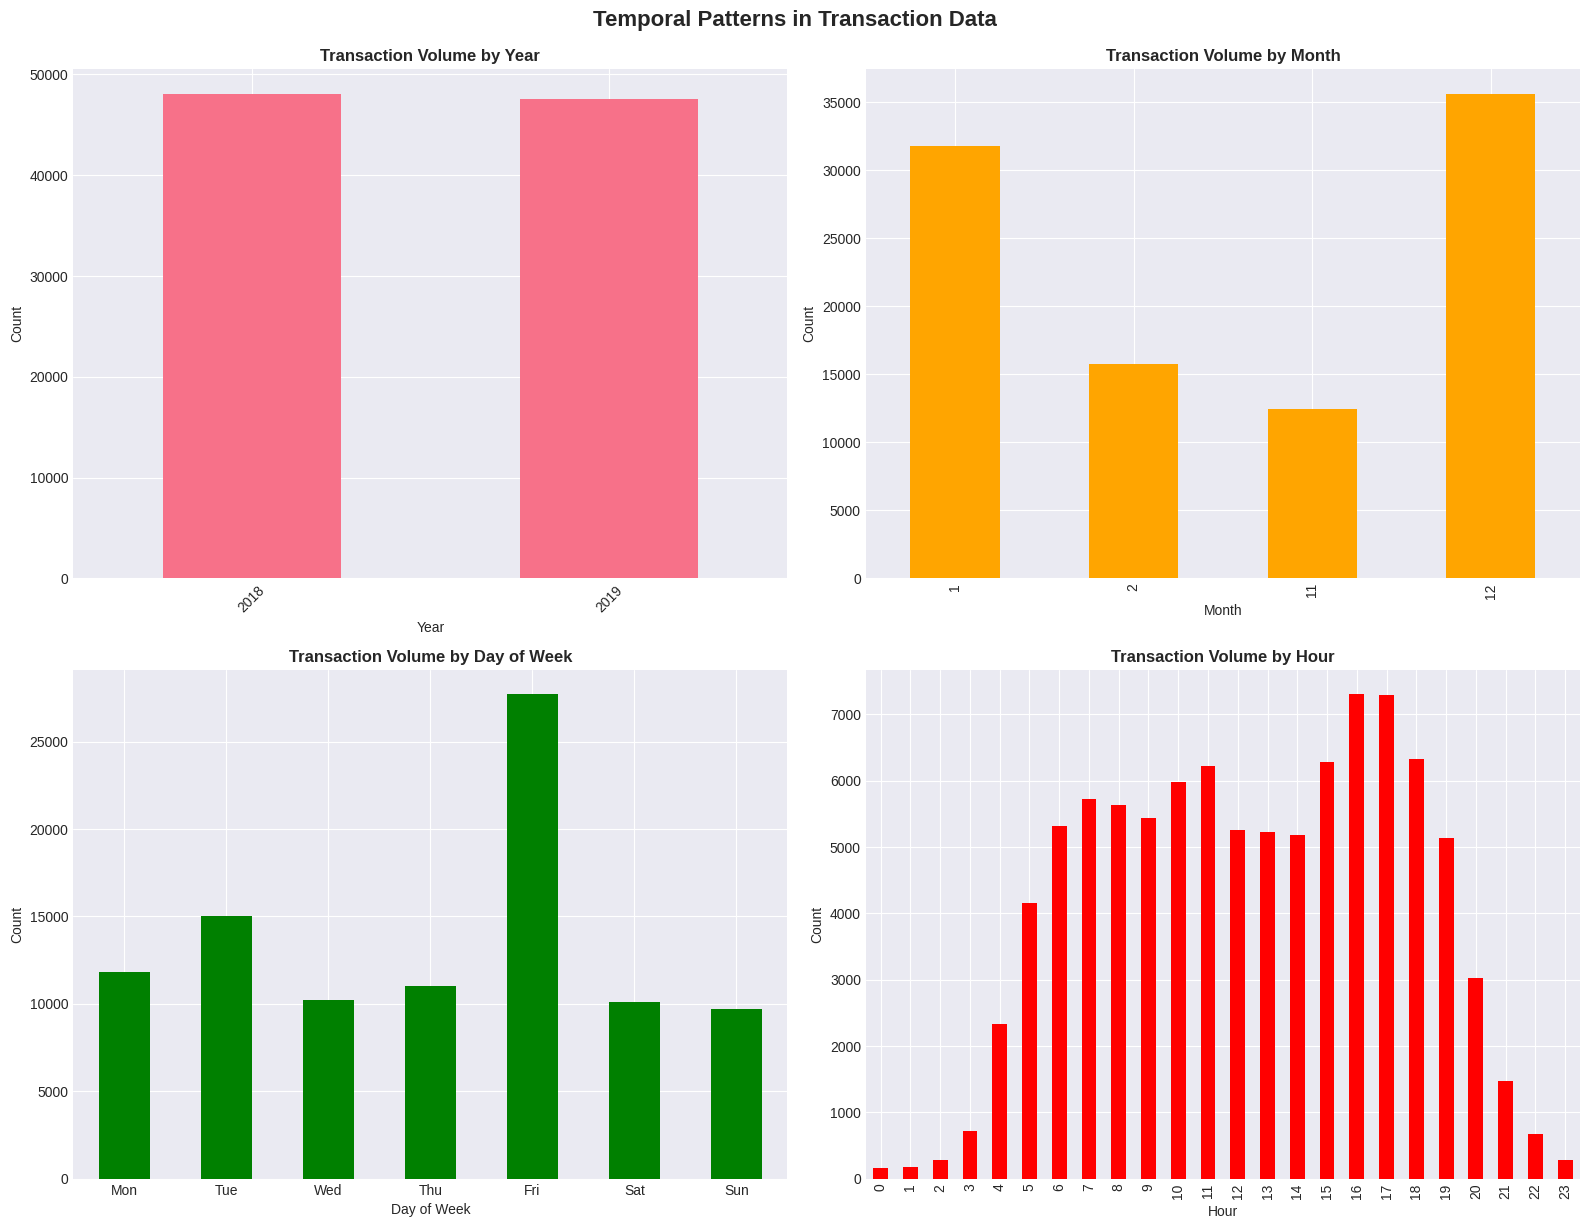

In [24]:
# Analyze temporal patterns if TransactionStartTime exists
if 'TransactionStartTime' in df.columns:
    try:
        df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
        df['Year'] = df['TransactionStartTime'].dt.year
        df['Month'] = df['TransactionStartTime'].dt.month
        df['DayOfWeek'] = df['TransactionStartTime'].dt.dayofweek
        df['Hour'] = df['TransactionStartTime'].dt.hour
        
        # Plot transaction volume over time
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        # Transactions by year
        df['Year'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0])
        axes[0, 0].set_title('Transaction Volume by Year', fontweight='bold')
        axes[0, 0].set_xlabel('Year')
        axes[0, 0].set_ylabel('Count')
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # Transactions by month
        df['Month'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1], color='orange')
        axes[0, 1].set_title('Transaction Volume by Month', fontweight='bold')
        axes[0, 1].set_xlabel('Month')
        axes[0, 1].set_ylabel('Count')
        
        # Transactions by day of week
        day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        df['DayOfWeek'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], color='green')
        axes[1, 0].set_title('Transaction Volume by Day of Week', fontweight='bold')
        axes[1, 0].set_xlabel('Day of Week')
        axes[1, 0].set_ylabel('Count')
        axes[1, 0].set_xticklabels([day_names[i] for i in sorted(df['DayOfWeek'].unique())], rotation=0)
        
        # Transactions by hour
        df['Hour'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], color='red')
        axes[1, 1].set_title('Transaction Volume by Hour', fontweight='bold')
        axes[1, 1].set_xlabel('Hour')
        axes[1, 1].set_ylabel('Count')
        
        plt.tight_layout()
        plt.suptitle('Temporal Patterns in Transaction Data', fontsize=16, fontweight='bold', y=1.02)
        plt.show()
        
    except Exception as e:
        print(f"Could not parse TransactionStartTime: {e}")
else:
    print("TransactionStartTime column not found or not in datetime format")


## 10. Key Insights and Summary

### Top 3-5 Most Important Insights:


**After running the analysis above, summarize your findings here:**

1. **Insight 1**: [Describe the most important finding about data structure/quality]
   - Impact on feature engineering: [How this affects your approach]

2. **Insight 2**: [Describe key pattern or distribution finding]
   - Impact on feature engineering: [How this affects your approach]

3. **Insight 3**: [Describe correlation or relationship finding]
   - Impact on feature engineering: [How this affects your approach]

4. **Insight 4**: [Describe missing values or data quality finding]
   - Impact on feature engineering: [How this affects your approach]

5. **Insight 5**: [Describe outlier or anomaly finding]
   - Impact on feature engineering: [How this affects your approach]


In [25]:
# Example insights template (to be filled after analysis)
insights = {
    "Data Quality": "Summary of data quality issues found",
    "Key Patterns": "Summary of key patterns identified",
    "Feature Relationships": "Summary of important correlations",
    "Outliers": "Summary of outlier patterns",
    "Missing Data": "Summary of missing data patterns",
    "Recommendations": "Recommendations for feature engineering"
}

print("=" * 80)
print("KEY INSIGHTS SUMMARY")
print("=" * 80)
for key, value in insights.items():
    print(f"\n{key}:")
    print(f"  {value}")


KEY INSIGHTS SUMMARY

Data Quality:
  Summary of data quality issues found

Key Patterns:
  Summary of key patterns identified

Feature Relationships:
  Summary of important correlations

Outliers:
  Summary of outlier patterns

Missing Data:
  Summary of missing data patterns

Recommendations:
  Recommendations for feature engineering


## 11. Feature Engineering Hypotheses

Based on the EDA findings, document hypotheses for feature engineering:

1. **RFM Features**: [Hypothesis about Recency, Frequency, Monetary features]
2. **Temporal Features**: [Hypothesis about time-based features]
3. **Categorical Encodings**: [Hypothesis about encoding categorical variables]
4. **Interaction Features**: [Hypothesis about feature interactions]
5. **Aggregation Features**: [Hypothesis about customer-level aggregations]
